In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [10]:
ruta_archivo = r'C:\Users\carli\Desktop\Metodos\food_delivery.xlsx'
df = pd.read_excel(ruta_archivo)
df.columns = df.columns.str.strip()  # Limpiar nombres de columnas
print(df.head())  # Verificar los datos

  order_id  distance_km  rider_speed weather  delivery_time
0  ORD1000         7.80        30.94   Snowy          31.30
1  ORD1001        19.04        26.08  Stormy          64.03
2  ORD1002        14.77        19.29   Windy          49.46
3  ORD1003        12.17        34.41   Clear          18.61
4  ORD1004         3.54        30.54   Windy          14.76


In [11]:
# Generar un resumen estadístico de las columnas numéricas
resumen = df.describe()   #SOLO SE UNA PARA COLUMNAS NUMERICAS,NO METE COLUMNAS CATEGORICAS

# Mostrar el resumen
print(resumen)

       distance_km  rider_speed  delivery_time
count   500.000000   495.000000     496.000000
mean     10.221880    24.514485      38.696835
std       5.824315     8.586322      22.082623
min       0.600000    10.140000       1.330000
25%       5.207500    16.905000      22.327500
50%      10.510000    24.280000      35.050000
75%      15.242500    31.890000      51.527500
max      19.860000    39.990000     125.080000


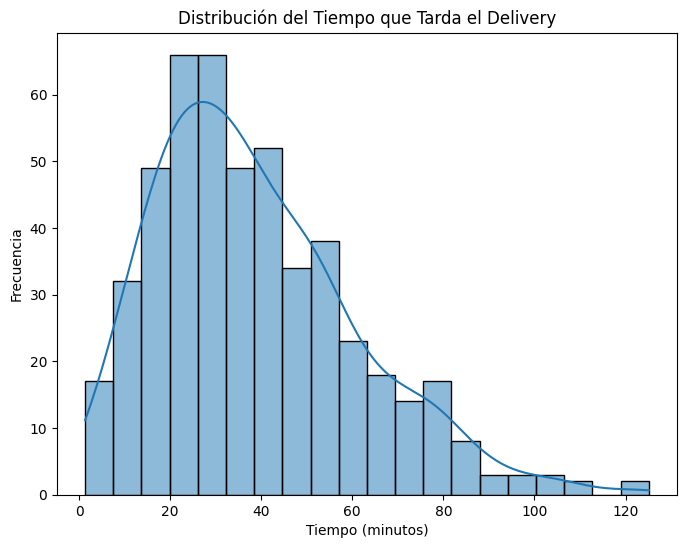

In [12]:
#DISTRIBUCION DE TIEMPO QUE TARDA EL DELIVERY
plt.figure(figsize=(8, 6))
sns.histplot(df['delivery_time'], bins=20, kde=True)  #kernel density estimation
plt.title('Distribución del Tiempo que Tarda el Delivery')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Frecuencia')
plt.show()

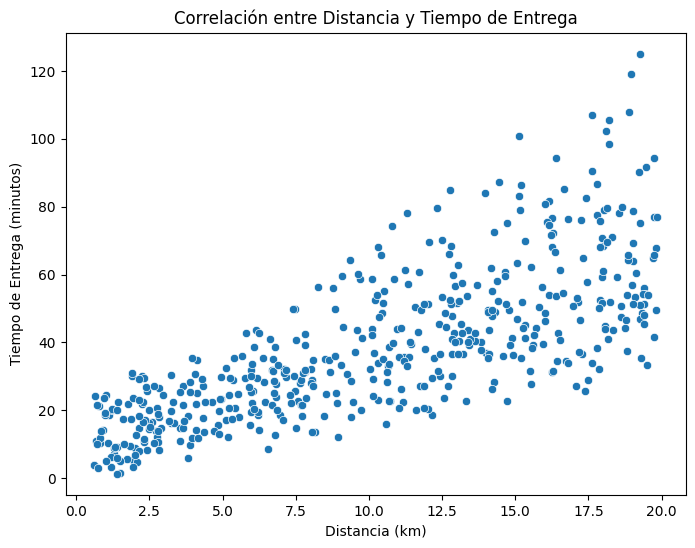

Coeficiente de correlación: 0.7538936417769726


In [13]:
# CORRELACION ENTRE DISTANCIA Y TIEMPO DE ENTREGA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance_km', y='delivery_time', data=df)
plt.title('Correlación entre Distancia y Tiempo de Entrega')
plt.xlabel('Distancia (km)')
plt.ylabel('Tiempo de Entrega (minutos)')
plt.show()
# Imprimir el coeficiente de correlación
print("Coeficiente de correlación:", df['distance_km'].corr(df['delivery_time']))

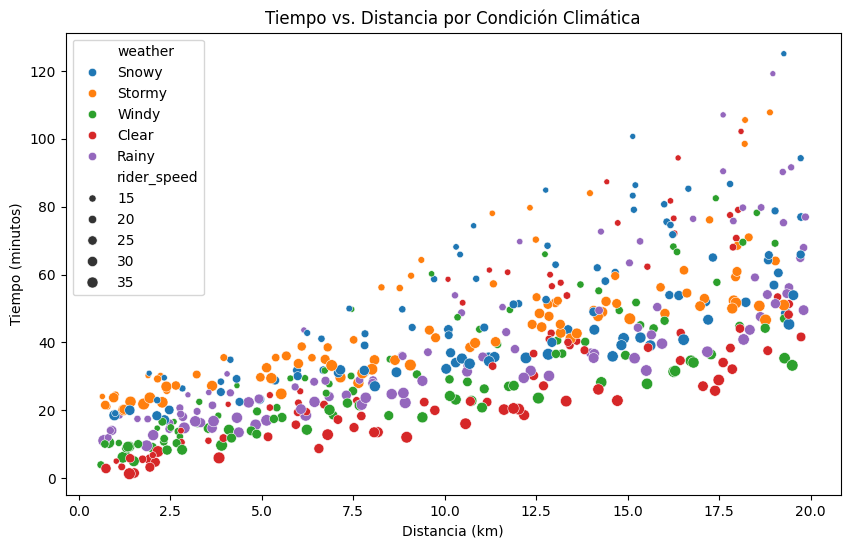

In [14]:
#TIEMPO VS. DISTANCIA POR CONDICION CLIMATICA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='delivery_time', hue='weather',size='rider_speed', data=df)
plt.title('Tiempo vs. Distancia por Condición Climática')
plt.xlabel('Distancia (km)')
plt.ylabel('Tiempo (minutos)')
plt.show()

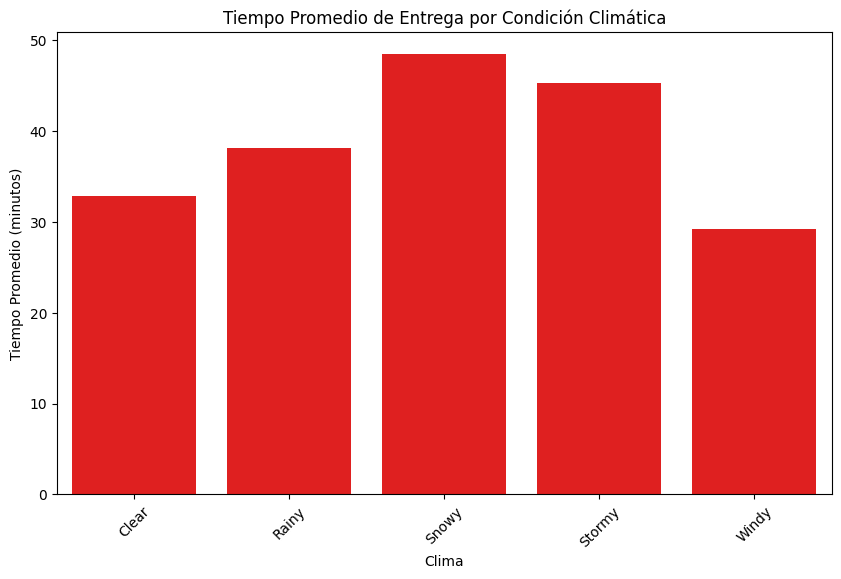

In [15]:
# Gráfico de barras: Tiempo promedio de entrega por clima
tiempo_promedio = df.groupby('weather')['delivery_time'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='delivery_time', data=tiempo_promedio,color="red")
plt.title('Tiempo Promedio de Entrega por Condición Climática')
plt.xlabel('Clima')
plt.ylabel('Tiempo Promedio (minutos)')
plt.xticks(rotation=45)
plt.show()

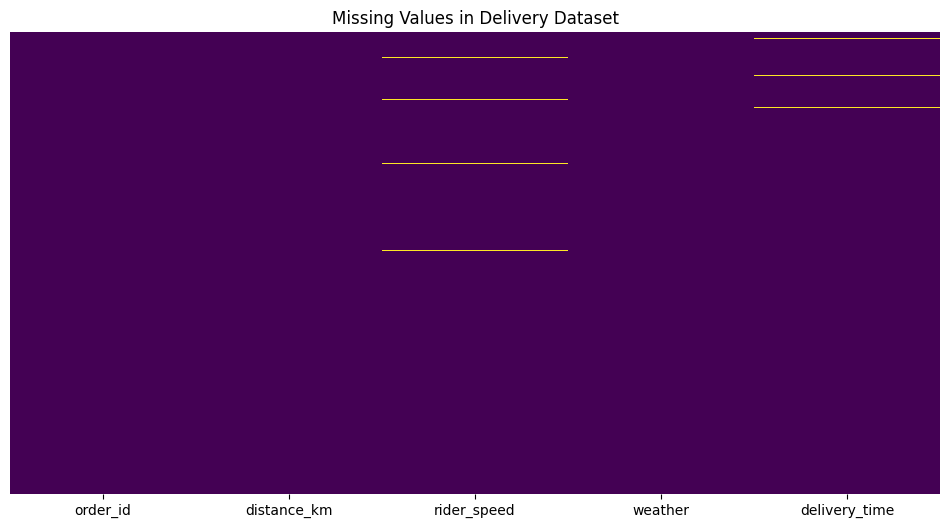

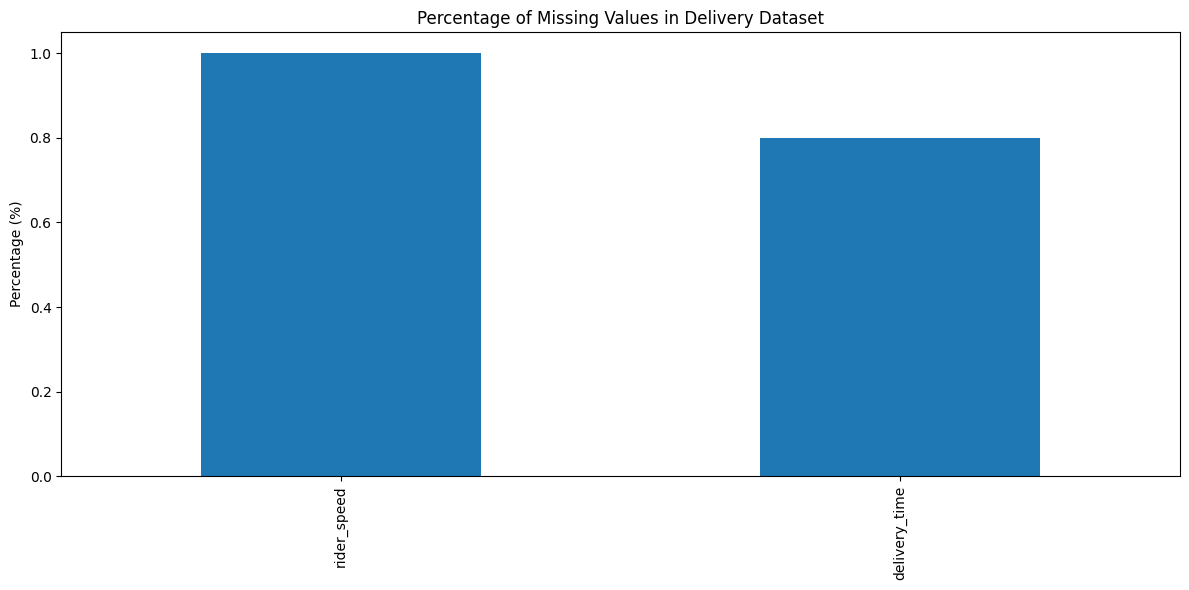

In [16]:
def visualize_missing_values(df, Food_Delivery):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title(f'Missing Values in {Food_Delivery} Dataset')
    plt.show()

    missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    missing_percentage = missing_percentage[missing_percentage > 0]

    plt.figure(figsize=(12, 6))
    missing_percentage.plot(kind='bar')
    plt.title(f'Percentage of Missing Values in {Food_Delivery} Dataset')
    plt.ylabel('Percentage (%)')
    plt.tight_layout()
    plt.show()

# Visualize missing values in your delivery dataset
visualize_missing_values(df, "Delivery")

In [17]:
#  Simple imputation (mean)   
# For numerical values
imputer_mean = SimpleImputer(strategy='mean')  
df_missing = df.copy()      
df_missing_numeric = df_missing.select_dtypes(include=['float64', 'int64'])  
numeric_cols = df_missing_numeric.columns   
df_imputed_mean = pd.DataFrame(            
    imputer_mean.fit_transform(df_missing_numeric), 
    columns=numeric_cols
)

# Compare original and imputed values for a column with missing values
missing_col = df_missing_numeric.columns[df_missing_numeric.isnull().any()][0]  
original_values = df_missing_numeric[missing_col]
imputed_mean_values = df_imputed_mean[missing_col]


# Verificar valores faltantes después de la imputación
for col in df_imputed_mean.columns:
    print(f"{col}: {df_imputed_mean[col].isnull().any()}")
# Verificar la columna weather (no imputada)
print(f"weather: {df['weather'].isnull().any()}")


distance_km: False
rider_speed: False
delivery_time: False
weather: False
